In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data.worldometers.csv',index_col=0)

In [3]:
data.head()

,infected
date,
2020-01-23,845
2020-01-24,1317
2020-01-25,2015
2020-01-26,2800
2020-01-27,4581


In [4]:
data.tail()

,infected
date,
2020-04-16,2162368
2020-04-17,2248865
2020-04-18,2330771
2020-04-19,2406575
2020-04-20,2480503


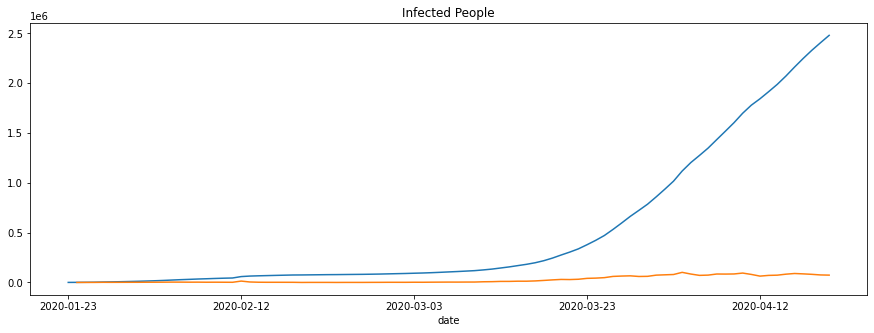

In [5]:
data.infected.plot(figsize=(15, 5), title='Infected People')
(data.infected - data.infected.shift(1)).plot(figsize=(15, 5))

In [6]:
from pyramid.arima import auto_arima

In [7]:
stepwise_model = auto_arima(data,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=1733.082, BIC=1747.878, Fit time=5.191 seconds
Fit ARIMA: order=(0, 2, 0); AIC=1750.853, BIC=1755.785, Fit time=0.046 seconds
Fit ARIMA: order=(1, 2, 0); AIC=1752.513, BIC=1759.911, Fit time=0.291 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1752.141, BIC=1759.539, Fit time=0.330 seconds
Fit ARIMA: order=(1, 2, 2); AIC=1748.944, BIC=1761.274, Fit time=4.641 seconds
Fit ARIMA: order=(3, 2, 2); AIC=1735.877, BIC=1753.138, Fit time=10.831 seconds
Fit ARIMA: order=(2, 2, 1); AIC=1749.524, BIC=1761.854, Fit time=3.915 seconds
Fit ARIMA: order=(2, 2, 3); AIC=1737.450, BIC=1754.711, Fit time=5.790 seconds
Fit ARIMA: order=(1, 2, 1); AIC=1754.277, BIC=1764.141, Fit time=2.912 seconds
Fit ARIMA: order=(3, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 34.253 seconds


In [8]:
stepwise_model.aic()

1733.0822361076375

In [9]:
stepwise_model.fit(data)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(2, 2, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [10]:
predicted_days = 5
firstPredictionDay = datetime.datetime.strptime(data.index[-1], '%Y-%m-%d') + datetime.timedelta(days = 1)

In [11]:
future_forecast = stepwise_model.predict(n_periods=predicted_days)

In [12]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(future_forecast[x])))

2020-04-21 - 2559881
2020-04-22 - 2645880
2020-04-23 - 2735730
2020-04-24 - 2824912
2020-04-25 - 2910256
